Importing Libraries and Understanding the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "retail_store_inventory.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Inspect the dataset structure
print("Initial Dataset Information:")
print(data.info())
print("\nSample Data:")
print(data.head())

# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

# Drop duplicates if any
data = data.drop_duplicates()

print(f"Dataset after removing duplicates has {data.shape[0]} rows.")


Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5),

Exploratory Data Analysis (EDA)


Statistical Summary of Numerical Columns:
       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min     

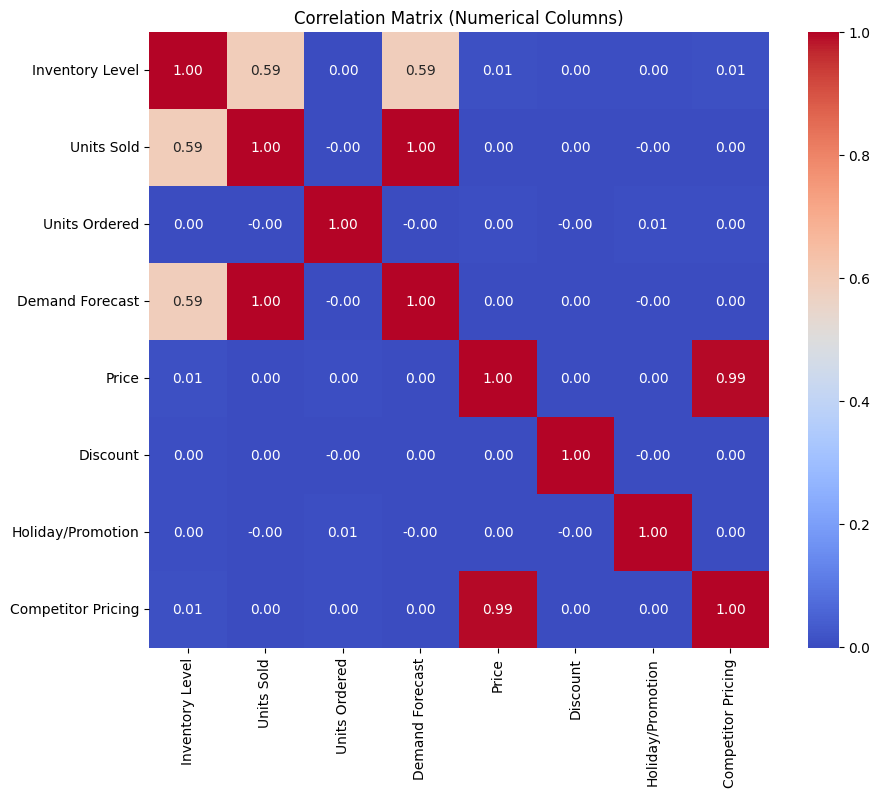

In [ ]:
# Statistical summary of the dataset
print("\nStatistical Summary of Numerical Columns:")
print(data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Visualizing demand distribution
if 'demand' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data['demand'], kde=True, bins=30, color='blue')
    plt.title("Demand Distribution")
    plt.xlabel("Demand")
    plt.ylabel("Frequency")
    plt.show()

# Correlation analysis (numerical columns only)
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Columns)")
plt.show()


Data Cleaning

In [ ]:
# Handle missing values
print("\nHandling Missing Values...")
missing_columns = data.columns[data.isnull().any()]
for col in missing_columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])  # Fill categorical with mode
    else:
        data[col] = data[col].fillna(data[col].median())  # Fill numerical with median
print("\nMissing Values After Handling:")
print(data.isnull().sum())

# Standardizing column names
print("\nStandardizing Column Names...")
data.columns = [col.lower().replace(" ", "_") for col in data.columns]
print("Updated Columns:", data.columns)


Handling Missing Values...

Missing Values After Handling:
Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

Standardizing Column Names...
Updated Columns: Index(['date', 'store_id', 'product_id', 'category', 'region',
       'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast',
       'price', 'discount', 'weather_condition', 'holiday/promotion',
       'competitor_pricing', 'seasonality'],
      dtype='object')


Feature Engineering

In [ ]:
# Create new features
print("\nCreating New Features...")

# Calculate inventory turnover rate
if 'sales' in data.columns and 'inventory_level' in data.columns:
    data['inventory_turnover'] = data['sales'] / data['inventory_level']
    data['inventory_turnover'] = data['inventory_turnover'].fillna(0)

# Extract month from date (if applicable)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['month'] = data['date'].dt.month

print("Sample Data After Feature Engineering:")
print(data.head())


Creating New Features...
Sample Data After Feature Engineering:
        date store_id product_id     category region  inventory_level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   units_sold  units_ordered  demand_forecast  price  discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  weather_condition  holiday/promotion  competitor_pricing seasonality  month  
0             Rainy

Scaling and Encoding

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Normalize numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Check existing columns
print("Available columns:", data.columns)

# Define numerical columns (adjust based on available columns)
numerical_cols = ['demand', 'inventory_level', 'sales']  # Adjust column names here

# Ensure only existing columns are used
numerical_cols = [col for col in numerical_cols if col in data.columns]

# Apply MinMaxScaler if numerical_cols is not empty
if numerical_cols:
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
else:
    print("No numerical columns found for scaling.")

# Encoding categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

print("Sample Data After Scaling and Encoding:")
print(data.head())

Available columns: Index(['date', 'store_id', 'product_id', 'category', 'region',
       'inventory_level', 'units_sold', 'units_ordered', 'demand_forecast',
       'price', 'discount', 'weather_condition', 'holiday/promotion',
       'competitor_pricing', 'seasonality', 'month'],
      dtype='object')
Sample Data After Scaling and Encoding:
        date  store_id  product_id  category  region  inventory_level  \
0 2022-01-01         0           0         3       1         0.402222   
1 2022-01-01         0           1         4       2         0.342222   
2 2022-01-01         0           2         4       3         0.115556   
3 2022-01-01         0           3         4       1         0.931111   
4 2022-01-01         0           4         1       0         0.257778   

   units_sold  units_ordered  demand_forecast  price  discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65      

Final Preprocessed Dataset

In [ ]:
# Save the preprocessed dataset
output_path = "processed_inventory_data.csv"
data.to_csv(output_path, index=False)

print(f"Preprocessed dataset saved to {output_path}.")

Preprocessed dataset saved to processed_inventory_data.csv.


PPO


In [15]:
# Install required packages in your environment:
# pip install numpy pandas stable-baselines3 gymnasium torch

import gymnasium as gym
import numpy as np
import pandas as pd
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
import os

# Step 1: Create the environment
# Ensure the environment is compatible
env_name = "CartPole-v1"
try:
    env = gym.make(env_name)
except Exception as e:
    raise RuntimeError(f"Failed to create environment '{env_name}': {e}")

# Step 2: Monitor the environment
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

# Step 3: Wrap the environment
env = DummyVecEnv([lambda: env])

# Step 4: Define and train the PPO model
try:
    model = PPO("MlpPolicy", env, verbose=1)
    model.learn(total_timesteps=10000)
except Exception as e:
    raise RuntimeError(f"Failed to initialize or train the PPO model: {e}")

# Step 5: Evaluate the model
episodes = 10
for ep in range(episodes):
    obs = env.reset()
    done = False
    total_rewards = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, rewards, done, info = env.step(action)
        total_rewards += rewards
    print(f"Episode {ep + 1}: Total Reward: {total_rewards}")

# Save the model
model.save("ppo_cartpole")
print("Model saved successfully.")

OSError: dlopen(/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib, 0x000A): tried: '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib' (no such file), '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/lib/libtorch_global_deps.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))